In [1]:
# Import necessary resources
import os
import sys
import inspect
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline


currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, os.path.join(parentdir, 'scripts'))

import models as m
import utils

In [2]:
# Define sample problem
# Initial condition
f_0 = 1

# differential equation
def f(x):
    return 2*x

In [3]:
x = torch.linspace(0, 1, 50, requires_grad=True).unsqueeze(1)

In [4]:
learning_rate = 0.001
epochs = 10000
display_step = 1000

# Define NN
neural_network = m.MLP()

# Create optimizer
optimizer = optim.Adam(neural_network.parameters(), lr=learning_rate)

for epoch in range(epochs):
    optimizer.zero_grad()
    loss = utils.first_order_loss(neural_network, f, f_0)
    loss.backward()
    optimizer.step()
    # print(loss.item())
    if epoch % display_step == 0:
        print(loss.item())


7.10966682434082
0.704510509967804
0.5131387710571289
0.4699929356575012
0.4177611470222473
0.3562490940093994
0.330177903175354
0.2827501893043518
0.19757080078125
0.14892888069152832


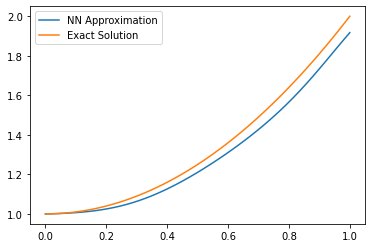

In [7]:
x = torch.linspace(0, 1, 50, requires_grad=True).unsqueeze(1)
y_approx = (f_0 + x * neural_network(x)).squeeze(0).detach().numpy().transpose()[0]
y_exact = (x**2 + 1).squeeze(0).detach().numpy().transpose()[0]
x = x.squeeze(0).detach().numpy().transpose()[0]
plt.plot(x, y_approx, label='NN Approximation')
plt.plot(x, y_exact, label='Exact Solution')
plt.legend()